Dataset link : https://www.kaggle.com/uciml/indian-liver-patient-records

### Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

* Age of the patient
* Gender of the patient 
* Total Bilirubin 
* Direct Bilirubin 
* Alkaline Phosphotase 
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens 
* Albumin 
* Albumin and Globulin Ratio 
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/indian_liver_patient.csv")

In [ ]:
df.shape

(583, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Only Albumin_and_Globulin_Ratio has 4 missing values 

In [ ]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
df = df.interpolate()

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

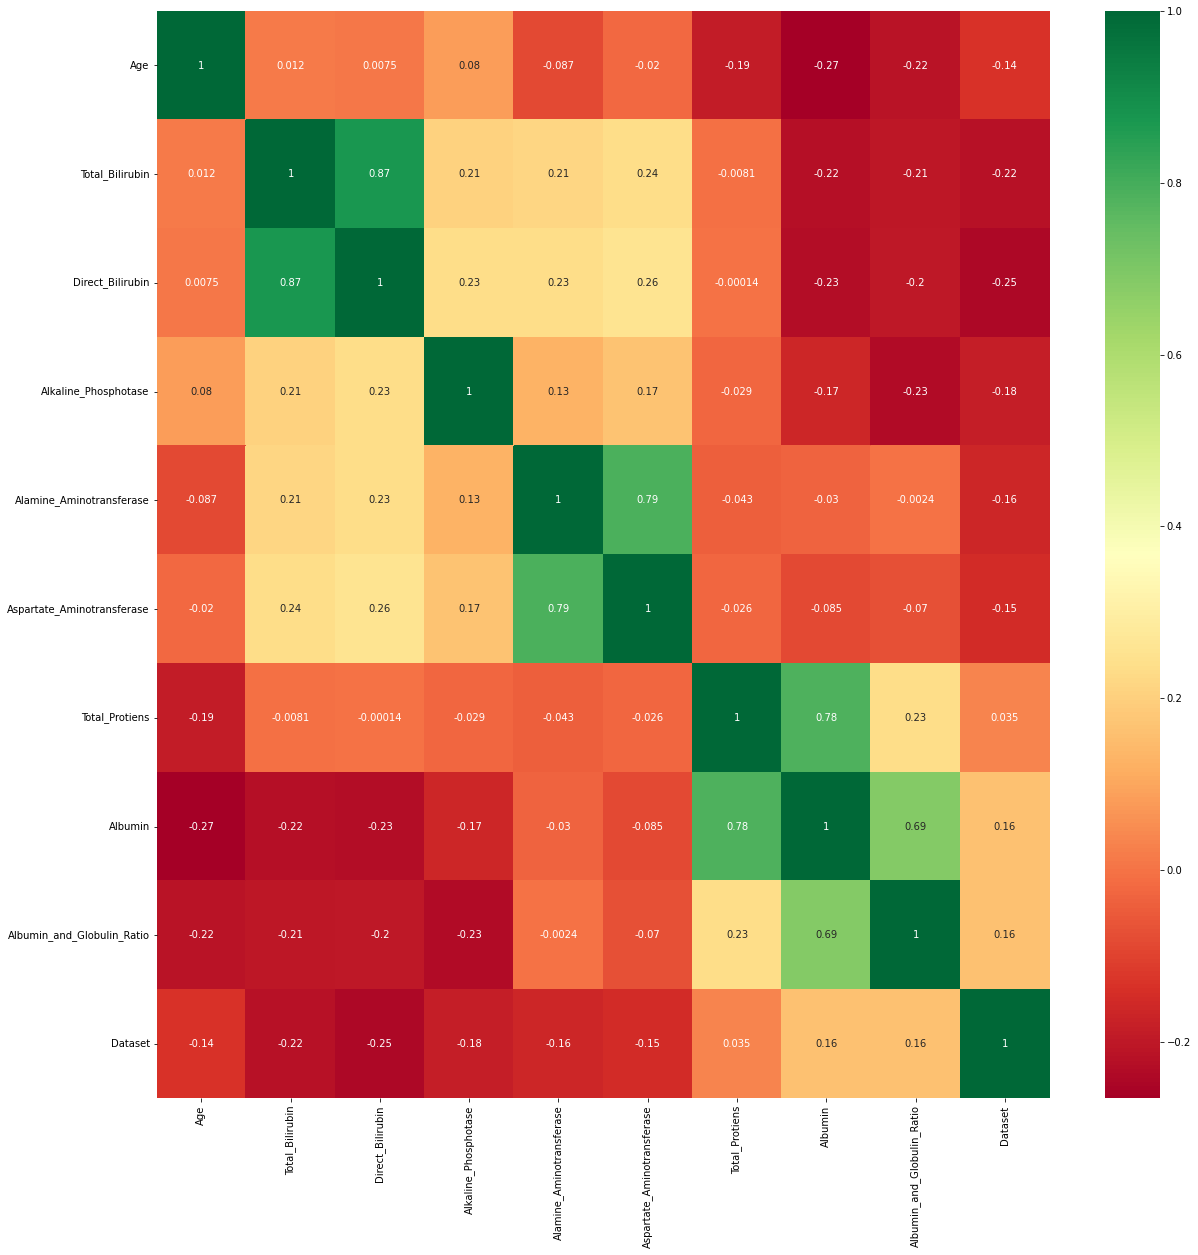

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
# checking dataset is balanced or not
true_count = len(df.loc[df['Dataset'] == 1])
false_count = len(df.loc[df['Dataset'] == 2])


In [ ]:
true_count, false_count

(416, 167)

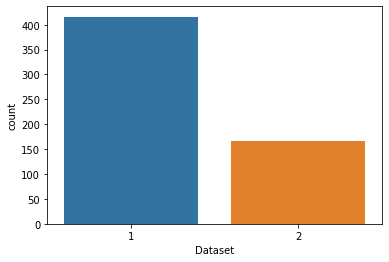

In [ ]:
# plotting graph for output classes counts
sns.countplot(x = 'Dataset',data = df)

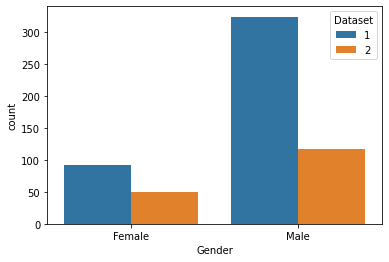

In [ ]:
sns.countplot('Gender', data = df, hue = 'Dataset')

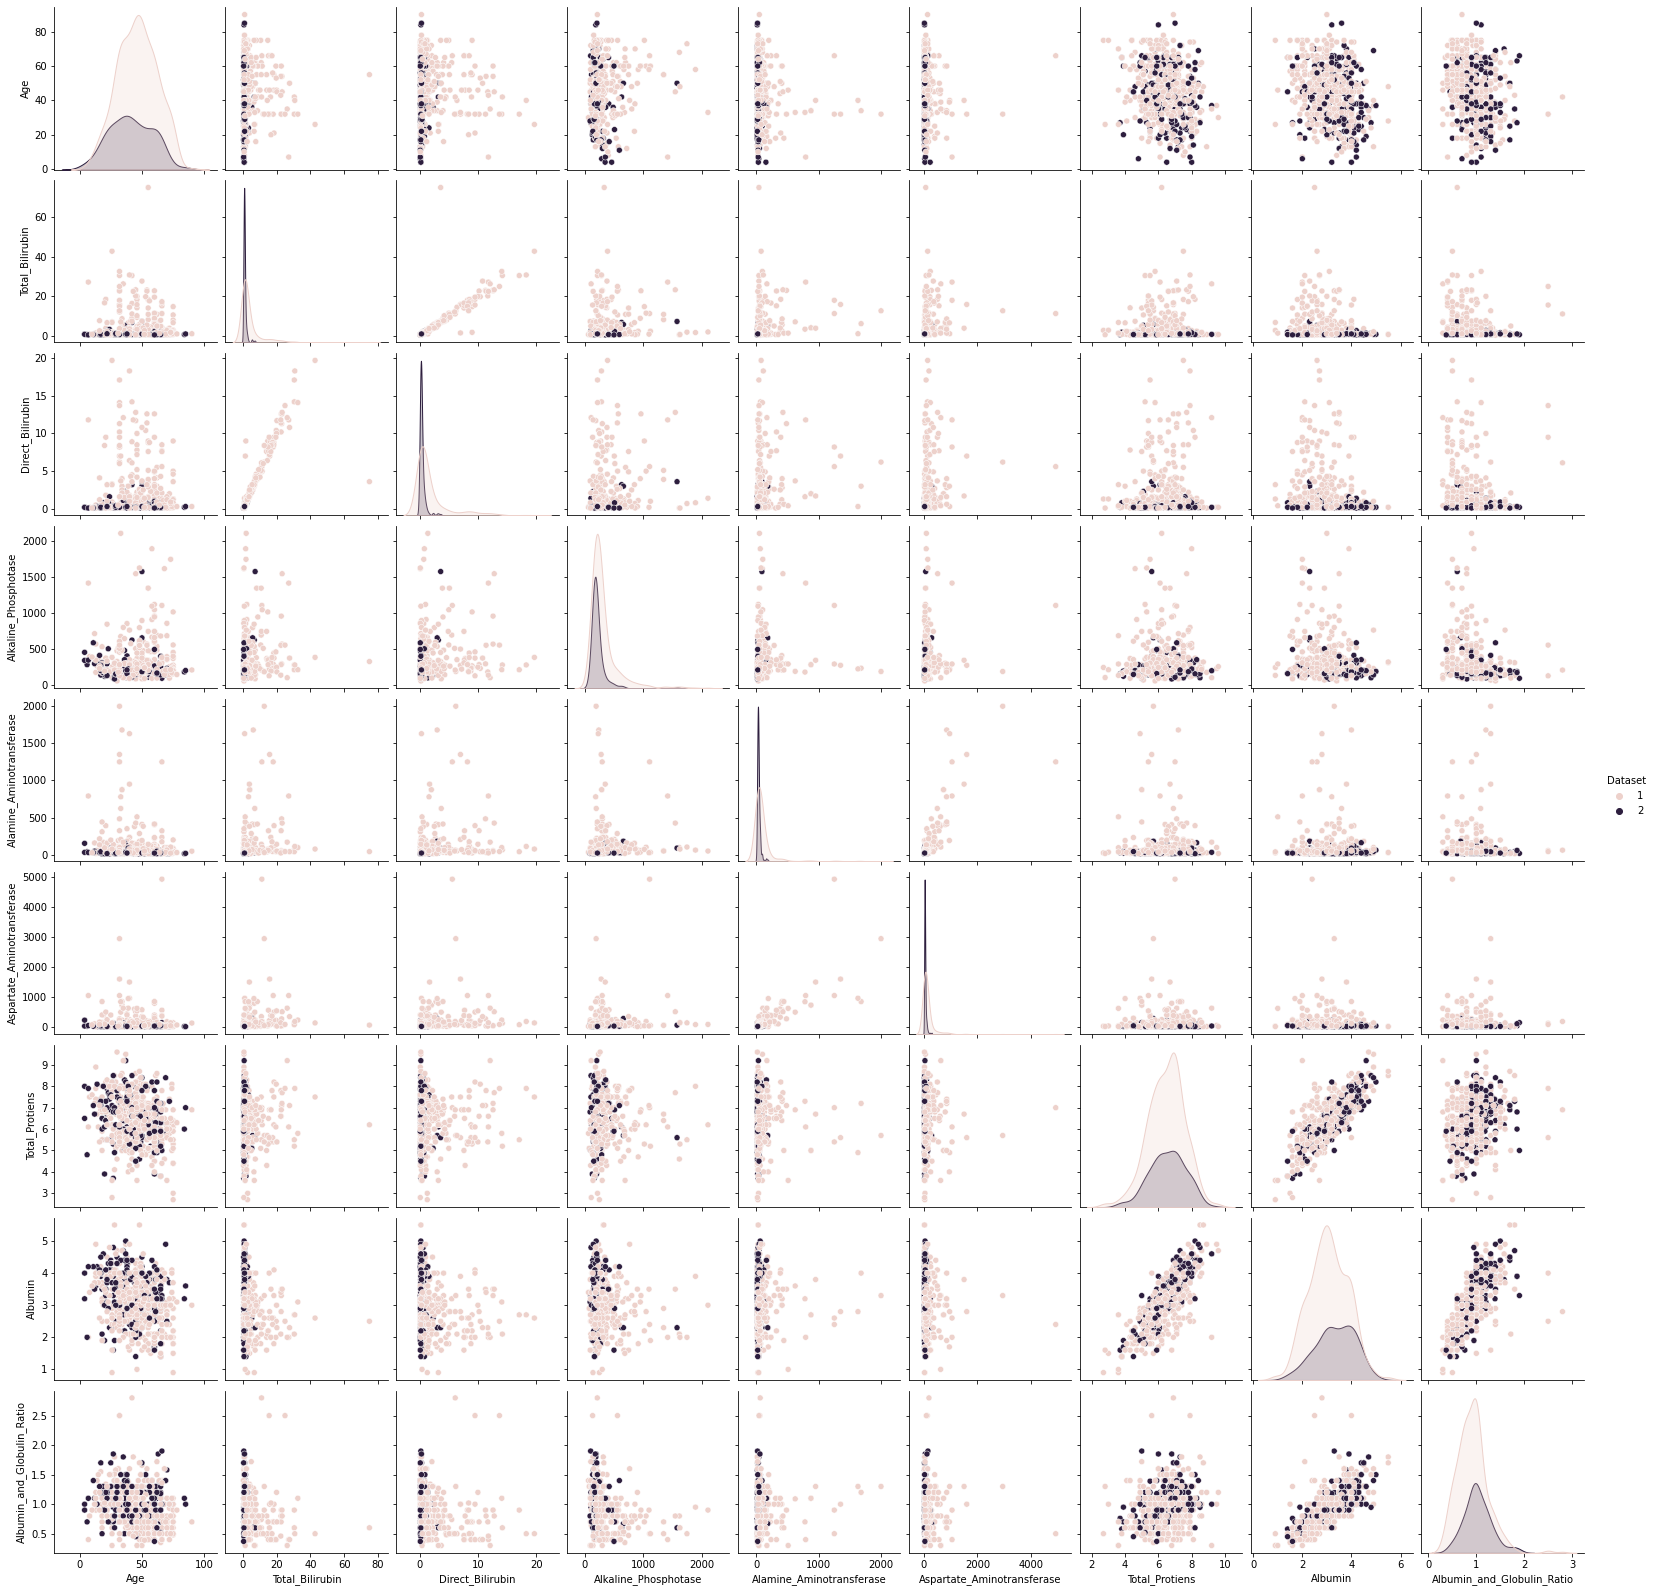

In [ ]:
sns.pairplot(df, hue = 'Dataset')

Only gender is object valued so we convert it to numeric

In [ ]:
def binary_encode(data, column, pos_value):
    data = data.copy()
    data[column] = data[column].apply(lambda x: 1 if x == pos_value else 0)
    return data

In [ ]:
df = binary_encode(df, 'Gender', 'Male') # 0 for Female 1 for male instead 2, 1 

In [ ]:
df = binary_encode(df, 'Dataset', 1)# 0 for healthy, 1 for Liver Disease

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.shape

(583, 11)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
feature_columns = ['Age','Gender','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                   'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
predicted_class = ['Dataset']

In [ ]:
X = df[feature_columns]
y = df[predicted_class]

Oversampling to have balanced data

In [ ]:
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state = 42)
X, y = smk.fit_resample(X,y)
X.shape, y.shape

((832, 10), (832, 1))

In [ ]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss()
# X, y = nm.fit_resample(X,y)
# X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((408, 10), (175, 10), (408, 1), (175, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
scaler = MinMaxScaler()
scaler.fit(xtrain[cols_to_scale])
xtrain[cols_to_scale] = scaler.transform(xtrain[cols_to_scale])
xtest[cols_to_scale] = scaler.transform(xtest[cols_to_scale])

In [ ]:
xtrain

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
321,0.320988,0.0,0.005362,0.005102,0.065950,0.010050,0.016014,0.352941,0.413043,0.320
36,0.160494,0.0,0.004021,0.005102,0.040059,0.004020,0.008518,0.647059,0.652174,0.352
42,0.469136,1.0,0.085791,0.158163,0.276991,0.007538,0.012266,0.485294,0.304348,0.120
8,0.160494,1.0,0.006702,0.010204,0.067904,0.006030,0.002726,0.676471,0.695652,0.360
401,0.567901,1.0,0.092493,0.183673,0.014167,0.017085,0.076661,0.588235,0.152174,0.000
...,...,...,...,...,...,...,...,...,...,...
68,0.765432,1.0,0.004021,0.005102,0.085979,0.008543,0.005111,0.514706,0.608696,0.440
335,0.111111,0.0,0.004021,0.000000,0.058134,0.007035,0.002726,0.897059,0.869565,0.360
482,0.506173,1.0,0.009383,0.015306,0.014167,0.040704,0.060307,0.647059,0.630435,0.324
324,0.691358,1.0,0.029491,0.056122,0.052760,0.016080,0.008859,0.382353,0.391304,0.280


In [ ]:
xtrain=X_train
ytrain=y_train
xtest=X_test
ytest=y_test

# LogisticRegression

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.5,0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = LogisticRegression(C= 10, penalty ='l1', solver= 'liblinear')
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote, y_train_smote = over.fit_resample(xtrain.astype('float'),ytrain)
    
    model.fit(X_train_smote, y_train_smote)
    modelTestAccuracy=model.score(xtest,ytest)
    modelTrainAccuracy=model.score(X_train_smote, y_train_smote)
    print("logreg Train Accuracy: ",modelTrainAccuracy)
    print("logreg Test Accuracy: ",modelTestAccuracy)

# for k in k_values:
# 	# define pipeline
# 	model = RandomForestClassifier()
# 	over = SMOTE(sampling_strategy=0.8,k_neighbors=k)
	
# 	randomTestAccuracy=random.score(xtest,ytest)
#   randomTrainAccuracy=random.score(X_train_smote, y_train_smote)
#   print(randomTestAccuracy)
#   print(randomTrainAccuracy)
	

For ratio  0.5
k-->  1
logreg Train Accuracy:  0.6961451247165533
logreg Test Accuracy:  0.6914285714285714
k-->  2
logreg Train Accuracy:  0.691609977324263
logreg Test Accuracy:  0.6857142857142857
k-->  3
logreg Train Accuracy:  0.7165532879818595
logreg Test Accuracy:  0.6971428571428572
k-->  4
logreg Train Accuracy:  0.7120181405895691
logreg Test Accuracy:  0.6971428571428572
k-->  5
logreg Train Accuracy:  0.7210884353741497
logreg Test Accuracy:  0.6971428571428572
k-->  6
logreg Train Accuracy:  0.7210884353741497
logreg Test Accuracy:  0.6971428571428572
k-->  7
logreg Train Accuracy:  0.7074829931972789
logreg Test Accuracy:  0.6742857142857143
k-->  8
logreg Train Accuracy:  0.7029478458049887
logreg Test Accuracy:  0.6971428571428572
k-->  9
logreg Train Accuracy:  0.6893424036281179
logreg Test Accuracy:  0.6914285714285714
k-->  10
logreg Train Accuracy:  0.7052154195011338
logreg Test Accuracy:  0.6857142857142857
For ratio  0.6
k-->  1
logreg Train Accuracy:  0.710638

In [ ]:
over_random = SMOTE(sampling_strategy=0.7,k_neighbors=2,random_state=42)
X_train_smote_lr, y_train_smote_lr = over_random.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C= 10, penalty ='l1', solver= 'liblinear')

In [ ]:
logreg.fit(xtrain,ytrain)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [ ]:
logisticTestAccuracy=logreg.score(xtest,ytest)
logisticTrainAccuracy=logreg.score(xtrain,ytrain)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)


0.7142857142857143
0.7254901960784313


In [ ]:
lr_probs = logreg.predict_proba(xtest)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(ytest, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.747


In [ ]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

In [ ]:
Logpred=logreg.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest,Logpred)
print(confusion_matrix)


[[  8  42]
 [  8 117]]


# RandomForestClassifier

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.5,0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = RandomForestClassifier(random_state=42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote, y_train_smote = over.fit_resample(xtrain.astype('float'),ytrain)
    
    model.fit(X_train_smote, y_train_smote)
    randomTestAccuracy=model.score(xtest,ytest)
    randomTrainAccuracy=model.score(X_train_smote, y_train_smote)
    print("Random Train Accuracy: ",randomTrainAccuracy)
    print("Random Test Accuracy: ",randomTestAccuracy)
	

For ratio  0.5
k-->  1
Random Train Accuracy:  1.0
Random Test Accuracy:  0.6971428571428572
k-->  2
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7085714285714285
k-->  3
Random Train Accuracy:  1.0
Random Test Accuracy:  0.68
k-->  4
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7085714285714285
k-->  5
Random Train Accuracy:  1.0
Random Test Accuracy:  0.6857142857142857
k-->  6
Random Train Accuracy:  1.0
Random Test Accuracy:  0.6914285714285714
k-->  7
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7085714285714285
k-->  8
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7085714285714285
k-->  9
Random Train Accuracy:  1.0
Random Test Accuracy:  0.72
k-->  10
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7028571428571428
For ratio  0.6
k-->  1
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7085714285714285
k-->  2
Random Train Accuracy:  1.0
Random Test Accuracy:  0.7142857142857143
k-->  3
Random Train Accuracy:  1.0
Random Test Accuracy:  0.

In [ ]:
over_random = SMOTE(sampling_strategy=0.5,k_neighbors=4,random_state=42)
X_train_smote_random, y_train_smote_random = over_random.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(random_state=42)

In [ ]:
random.fit(X_train_smote_random, y_train_smote_random )

RandomForestClassifier(random_state=42)

In [ ]:
randomTestAccuracy=random.score(xtest,ytest)
randomTrainAccuracy=random.score(X_train_smote_random, y_train_smote_random )
print(randomTestAccuracy)
print(randomTrainAccuracy)

0.7371428571428571
1.0


In [ ]:
rf_probs = random.predict_proba(xtest)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(ytest, rf_probs)
print('Random: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)

Random: ROC AUC=0.763


In [ ]:
Randompred=random.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(ytest,Randompred)
print(confusion_matrix1)

[[ 25  28]
 [ 15 107]]


In [ ]:

for n_estimator in range(1,100):

  model7t = RandomForestClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(X_train_smote_random, y_train_smote_random)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(X_train_smote_random, y_train_smote_random)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)

For estimator :  1
Training accuracy:
0.8367346938775511
Test accuracy:
0.6228571428571429
For estimator :  2
Training accuracy:
0.8435374149659864
Test accuracy:
0.5885714285714285
For estimator :  3
Training accuracy:
0.9501133786848073
Test accuracy:
0.6742857142857143
For estimator :  4
Training accuracy:
0.9387755102040817
Test accuracy:
0.6514285714285715
For estimator :  5
Training accuracy:
0.9705215419501134
Test accuracy:
0.7142857142857143
For estimator :  6
Training accuracy:
0.9659863945578231
Test accuracy:
0.6914285714285714
For estimator :  7
Training accuracy:
0.9841269841269841
Test accuracy:
0.72
For estimator :  8
Training accuracy:
0.9863945578231292
Test accuracy:
0.6857142857142857
For estimator :  9
Training accuracy:
0.9909297052154195
Test accuracy:
0.72
For estimator :  10
Training accuracy:
0.9909297052154195
Test accuracy:
0.7028571428571428
For estimator :  11
Training accuracy:
0.9954648526077098
Test accuracy:
0.7142857142857143
For estimator :  12
Train

# SVM

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = SVC(probability=True,kernel='rbf')
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t_random, y_train_smote_t_random = over.fit_resample(X_train,y_train)
    
    model.fit(X_train_smote_t_random, y_train_smote_t_random)
    knnTestAccuracy=model.score(X_test,y_test)
    knnTrainAccuracy=model.score(X_train_smote_t_random, y_train_smote_t_random)
    predictionrandom = model.predict(X_test)
    print("svm Train Accuracy: ",knnTrainAccuracy)
    print("svm Test Accuracy: ",knnTestAccuracy)



For ratio  0.6
k-->  1
svm Train Accuracy:  0.6595744680851063
svm Test Accuracy:  0.6628571428571428
k-->  2
svm Train Accuracy:  0.6914893617021277
svm Test Accuracy:  0.6457142857142857
k-->  3
svm Train Accuracy:  0.6936170212765957
svm Test Accuracy:  0.6914285714285714
k-->  4
svm Train Accuracy:  0.6914893617021277
svm Test Accuracy:  0.6628571428571428
k-->  5
svm Train Accuracy:  0.7
svm Test Accuracy:  0.6685714285714286
k-->  6
svm Train Accuracy:  0.6851063829787234
svm Test Accuracy:  0.6857142857142857
k-->  7
svm Train Accuracy:  0.674468085106383
svm Test Accuracy:  0.6514285714285715
k-->  8
svm Train Accuracy:  0.6787234042553192
svm Test Accuracy:  0.68
k-->  9
svm Train Accuracy:  0.674468085106383
svm Test Accuracy:  0.6457142857142857
k-->  10
svm Train Accuracy:  0.674468085106383
svm Test Accuracy:  0.6571428571428571
For ratio  0.7
k-->  1
svm Train Accuracy:  0.685370741482966
svm Test Accuracy:  0.6171428571428571
k-->  2
svm Train Accuracy:  0.69138276553106

In [ ]:
over_random = SMOTE(sampling_strategy=1,k_neighbors=2,random_state=42)
X_train_smote_svm, y_train_smote_svm = over_random.fit_resample(X_train,y_train)

In [ ]:
 from sklearn.svm import SVC
 svm=SVC(probability=True,kernel='rbf')

In [ ]:
svm.fit(xtrain,ytrain)

SVC(probability=True)

In [ ]:
svmTestAccuracy=svm.score(xtest,ytest)
svmTrainAccuracy=svm.score(xtrain,ytrain)
print(svmTestAccuracy)
print(svmTrainAccuracy)


0.7142857142857143
0.7132352941176471


In [ ]:
sb_probs = svm.predict_proba(xtest)
sb_probs = sb_probs[:, 1]
sb_auc = roc_auc_score(ytest, sb_probs)
print('Svm: ROC AUC=%.3f' % (sb_auc))
# calculate roc curves
sb_fpr, sb_tpr, _ = roc_curve(ytest, sb_probs)

Svm: ROC AUC=0.715


In [ ]:
SVMpred=svm.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(ytest,SVMpred)
print(confusion_matrix3)

[[  0  50]
 [  0 125]]


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.5,0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = KNeighborsClassifier()
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t_random, y_train_smote_t_random = over.fit_resample(X_train,y_train)
    
    model.fit(X_train_smote_t_random, y_train_smote_t_random)
    knnTestAccuracy=model.score(X_test,y_test)
    knnTrainAccuracy=model.score(X_train_smote_t_random, y_train_smote_t_random)
    predictionrandom = model.predict(X_test)
    print("knn Train Accuracy: ",knnTrainAccuracy)
    print("knn Test Accuracy: ",knnTestAccuracy)



For ratio  0.5
k-->  1
knn Train Accuracy:  0.7913832199546486
knn Test Accuracy:  0.6228571428571429
k-->  2
knn Train Accuracy:  0.7981859410430839
knn Test Accuracy:  0.64
k-->  3
knn Train Accuracy:  0.7891156462585034
knn Test Accuracy:  0.6228571428571429
k-->  4
knn Train Accuracy:  0.8163265306122449
knn Test Accuracy:  0.6342857142857142
k-->  5
knn Train Accuracy:  0.7913832199546486
knn Test Accuracy:  0.6342857142857142
k-->  6
knn Train Accuracy:  0.7959183673469388
knn Test Accuracy:  0.6628571428571428
k-->  7
knn Train Accuracy:  0.7981859410430839
knn Test Accuracy:  0.6514285714285715
k-->  8
knn Train Accuracy:  0.7913832199546486
knn Test Accuracy:  0.6285714285714286
k-->  9
knn Train Accuracy:  0.7868480725623582
knn Test Accuracy:  0.6514285714285715
k-->  10
knn Train Accuracy:  0.7732426303854876
knn Test Accuracy:  0.6628571428571428
For ratio  0.6
k-->  1
knn Train Accuracy:  0.8
knn Test Accuracy:  0.6057142857142858
k-->  2
knn Train Accuracy:  0.8148936170

In [ ]:
over_random = SMOTE(sampling_strategy=0.6,k_neighbors=3,random_state=42)
X_train_smote_knn, y_train_smote_knn = over_random.fit_resample(X_train,y_train)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
knTestAccuracy=neigh.score(xtest,ytest)
knTrainAccuracy=neigh.score(xtrain,ytrain)
print(knTestAccuracy)
print(knTrainAccuracy)

0.7028571428571428
0.7132352941176471


In [ ]:
KNNpred=neigh.predict(xtest)

In [ ]:
kn_probs = neigh.predict_proba(xtest)
kn_probs = kn_probs[:, 1]
kn_auc = roc_auc_score(ytest, kn_probs)
print('Kn: ROC AUC=%.3f' % (kn_auc))
# calculate roc curves
kn_fpr, kn_tpr, _ = roc_curve(ytest, kn_probs)

Kn: ROC AUC=0.690


# Decision tree

In [ ]:
from numpy import mean
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.5,0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = tree.DecisionTreeClassifier(max_depth=17,max_features=7,splitter='best',random_state=42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t, y_train_smote_t = over.fit_resample(xtrain,ytrain)
    
    model.fit(X_train_smote_t, y_train_smote_t)
    predictionclf6 = model.predict(xtest)
    modelTestAccuracy=model.score(xtest,ytest)
    modelTrainAccuracy=model.score(X_train_smote_t, y_train_smote_t)
    print("Decision tree Train Accuracy: ",modelTrainAccuracy)
    print("Decision tree  Test Accuracy: ",modelTestAccuracy)


For ratio  0.5
k-->  1
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.5942857142857143
k-->  2
Decision tree Train Accuracy:  0.9977324263038548
Decision tree  Test Accuracy:  0.6971428571428572
k-->  3
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6285714285714286
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6514285714285715
k-->  5
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6742857142857143
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.68
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6685714285714286
k-->  8
Decision tree Train Accuracy:  0.9977324263038548
Decision tree  Test Accuracy:  0.6742857142857143
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6685714285714286
k-->  10
Decision tree Train Accuracy:  0.9977324263038548
Decision tree  Test Accuracy:  0.6057142857142858
For ratio  0.6
k-->  1


In [ ]:
from sklearn import tree
over = SMOTE(sampling_strategy=0.6,k_neighbors=2,random_state=42)
X_train_smote_dt, y_train_smote_dt = over.fit_resample(xtrain,ytrain)


In [ ]:
clf6= tree.DecisionTreeClassifier(max_depth=17,max_features=7,splitter='best',
                       random_state=42)
clf6.fit(X_train_smote_dt, y_train_smote_dt)
predictionclf6 = clf6.predict(xtest)
treeTestAcc=accuracy_score(ytest,predictionclf6)
treeTrainAcc=clf6.score(X_train_smote_dt, y_train_smote_dt)
print("Training accuracy:")
print(treeTrainAcc)
print("Test accuracy:")
print(treeTestAcc)
print(confusion_matrix(ytest,predictionclf6))

Training accuracy:
0.997872340425532
Test accuracy:
0.7085714285714285
[[26 27]
 [24 98]]


In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dicission tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dicission tree: ROC AUC=0.649


In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth,max_features=8,random_state=42)
   dt.fit(X_train_smote_dt, y_train_smote_dt)
   predictionclf6 = dt.predict(xtest)
   treeTestAcc=dt.score(xtest,ytest)
   treeTrainAcc=dt.score(X_train_smote_dt, y_train_smote_dt)
   print("For max_depth : ",max_depth)
   print("Training accuracy:")
   print(treeTrainAcc)
   print("Test accuracy:")
   print(treeTestAcc)

   

For max_depth :  1.0
Training accuracy:
0.6361702127659574
Test accuracy:
0.5428571428571428
For max_depth :  2.0
Training accuracy:
0.7148936170212766
Test accuracy:
0.6742857142857143
For max_depth :  3.0
Training accuracy:
0.7404255319148936
Test accuracy:
0.6685714285714286
For max_depth :  4.0
Training accuracy:
0.7787234042553192
Test accuracy:
0.6457142857142857
For max_depth :  5.0
Training accuracy:
0.8085106382978723
Test accuracy:
0.6628571428571428
For max_depth :  6.0
Training accuracy:
0.8595744680851064
Test accuracy:
0.6514285714285715
For max_depth :  7.0
Training accuracy:
0.8680851063829788
Test accuracy:
0.6628571428571428
For max_depth :  8.0
Training accuracy:
0.9085106382978724
Test accuracy:
0.6514285714285715
For max_depth :  9.0
Training accuracy:
0.9382978723404255
Test accuracy:
0.6971428571428572
For max_depth :  10.0
Training accuracy:
0.9340425531914893
Test accuracy:
0.7028571428571428
For max_depth :  11.0
Training accuracy:
0.9680851063829787
Test accu

In [ ]:
max_features = list(range(1,xtrain.shape[1]))
for max_feature in max_features:
   dt = tree.DecisionTreeClassifier(max_features=max_feature,
                       random_state=42)
   dt.fit(X_train_smote_dt, y_train_smote_dt)
   predictionclf6 = dt.predict(xtest)
   treeTestAcc=dt.score(xtest,ytest)
   treeTrainAcc=dt.score(X_train_smote_dt, y_train_smote_dt)
   print("For min_sampes_spit : ",max_feature)
   print("Training accuracy:")
   print(treeTrainAcc)
   print("Test accuracy:")
   print(treeTestAcc)

For min_sampes_spit :  1
Training accuracy:
1.0
Test accuracy:
0.6
For min_sampes_spit :  2
Training accuracy:
1.0
Test accuracy:
0.6057142857142858
For min_sampes_spit :  3
Training accuracy:
1.0
Test accuracy:
0.5942857142857143
For min_sampes_spit :  4
Training accuracy:
1.0
Test accuracy:
0.64
For min_sampes_spit :  5
Training accuracy:
1.0
Test accuracy:
0.6285714285714286
For min_sampes_spit :  6
Training accuracy:
1.0
Test accuracy:
0.6457142857142857
For min_sampes_spit :  7
Training accuracy:
1.0
Test accuracy:
0.6857142857142857
For min_sampes_spit :  8
Training accuracy:
1.0
Test accuracy:
0.6914285714285714
For min_sampes_spit :  9
Training accuracy:
1.0
Test accuracy:
0.6971428571428572


In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dtree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dtree: ROC AUC=0.640


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Extraa Trees Classifier

In [ ]:
from numpy import mean
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.5,0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = ExtraTreesClassifier(
                          n_estimators = 29,
                          random_state = 42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_e, y_train_smote_e = over.fit_resample(X_train,y_train)
    model.fit(X_train_smote_e, y_train_smote_e)
    predictionclf6 = model.predict(xtest)
    exTestAccuracy=model.score(xtest,ytest)
    exTrainAccuracy=model.score(X_train_smote_e, y_train_smote_e)
    print("Extraa tree Train Accuracy: ",exTrainAccuracy)
    print("Extraa tree  Test Accuracy: ",exTestAccuracy)


For ratio  0.5
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7085714285714285
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7542857142857143
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7257142857142858
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7085714285714285
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7371428571428571
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.6971428571428572
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7371428571428571
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7257142857142858
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.6971428571428572
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.72
For ratio  0.6
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.72
k-->  2
Extraa tre

In [ ]:
over = SMOTE(sampling_strategy=0.6,k_neighbors=5,random_state=42)
X_train_smote_ex, y_train_smote_ex = over.fit_resample(X_train,y_train)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model7 = ExtraTreesClassifier(
                          n_estimators = 29,
                          random_state = 42)
  
model7.fit(X_train_smote_ex, y_train_smote_ex)
predictionclf7 = model7.predict(xtest)
etreeTestAcc=accuracy_score(ytest,predictionclf7)
etreeTrainAcc=model7.score(X_train_smote_ex, y_train_smote_ex)
print("Training accuracy:")
print(etreeTrainAcc)
print("Test accuracy:")
print(etreeTestAcc)


Training accuracy:
1.0
Test accuracy:
0.7485714285714286


In [ ]:
ex_probs = model7.predict_proba(xtest)
ex_probs =ex_probs[:, 1]
ex_auc = roc_auc_score(ytest, ex_probs)
print('Extra tree: ROC AUC=%.3f' % (ex_auc))
# calculate roc curves
ex_fpr, ex_tpr, _ = roc_curve(ytest, ex_probs)

Extra tree: ROC AUC=0.748


**Extraa tree hyper perameter tuning**

In [ ]:

for n_estimator in range(1,100):

  model7t = ExtraTreesClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(X_train_smote_ex, y_train_smote_ex)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(X_train_smote_ex, y_train_smote_ex)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)
 

For estimator :  1
Training accuracy:
1.0
Test accuracy:
0.64
For estimator :  2
Training accuracy:
1.0
Test accuracy:
0.6228571428571429
For estimator :  3
Training accuracy:
1.0
Test accuracy:
0.6914285714285714
For estimator :  4
Training accuracy:
1.0
Test accuracy:
0.6742857142857143
For estimator :  5
Training accuracy:
1.0
Test accuracy:
0.7028571428571428
For estimator :  6
Training accuracy:
1.0
Test accuracy:
0.7085714285714285
For estimator :  7
Training accuracy:
1.0
Test accuracy:
0.6914285714285714
For estimator :  8
Training accuracy:
1.0
Test accuracy:
0.6971428571428572
For estimator :  9
Training accuracy:
1.0
Test accuracy:
0.6914285714285714
For estimator :  10
Training accuracy:
1.0
Test accuracy:
0.7085714285714285
For estimator :  11
Training accuracy:
1.0
Test accuracy:
0.72
For estimator :  12
Training accuracy:
1.0
Test accuracy:
0.7257142857142858
For estimator :  13
Training accuracy:
1.0
Test accuracy:
0.7085714285714285
For estimator :  14
Training accurac

# Comparison

No handles with labels found to put in legend.


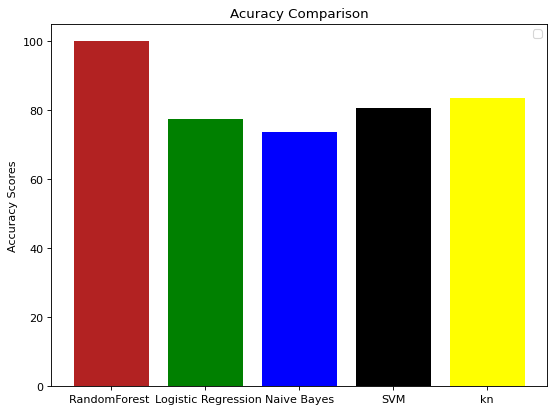

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x1 = np.array(["RandomForest ", "  Logistic Regression","Naive Bayes","SVM","kn"])
y1 = np.array([randomTrainAccuracy*100,logisticTrainAccuracy*100, gNBtrainAccuracy*100, svmTrainAccuracy*100,knTrainAccuracy*100])
plt.ylabel('Accuracy Scores')
plt.title('Acuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'green','blue','black','yellow'])
plt.legend()
plt.show()

In [ ]:
!pip install matplotlib==3.4.2


     |████████████████████████████████| 10.3 MB 4.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Performance analysis

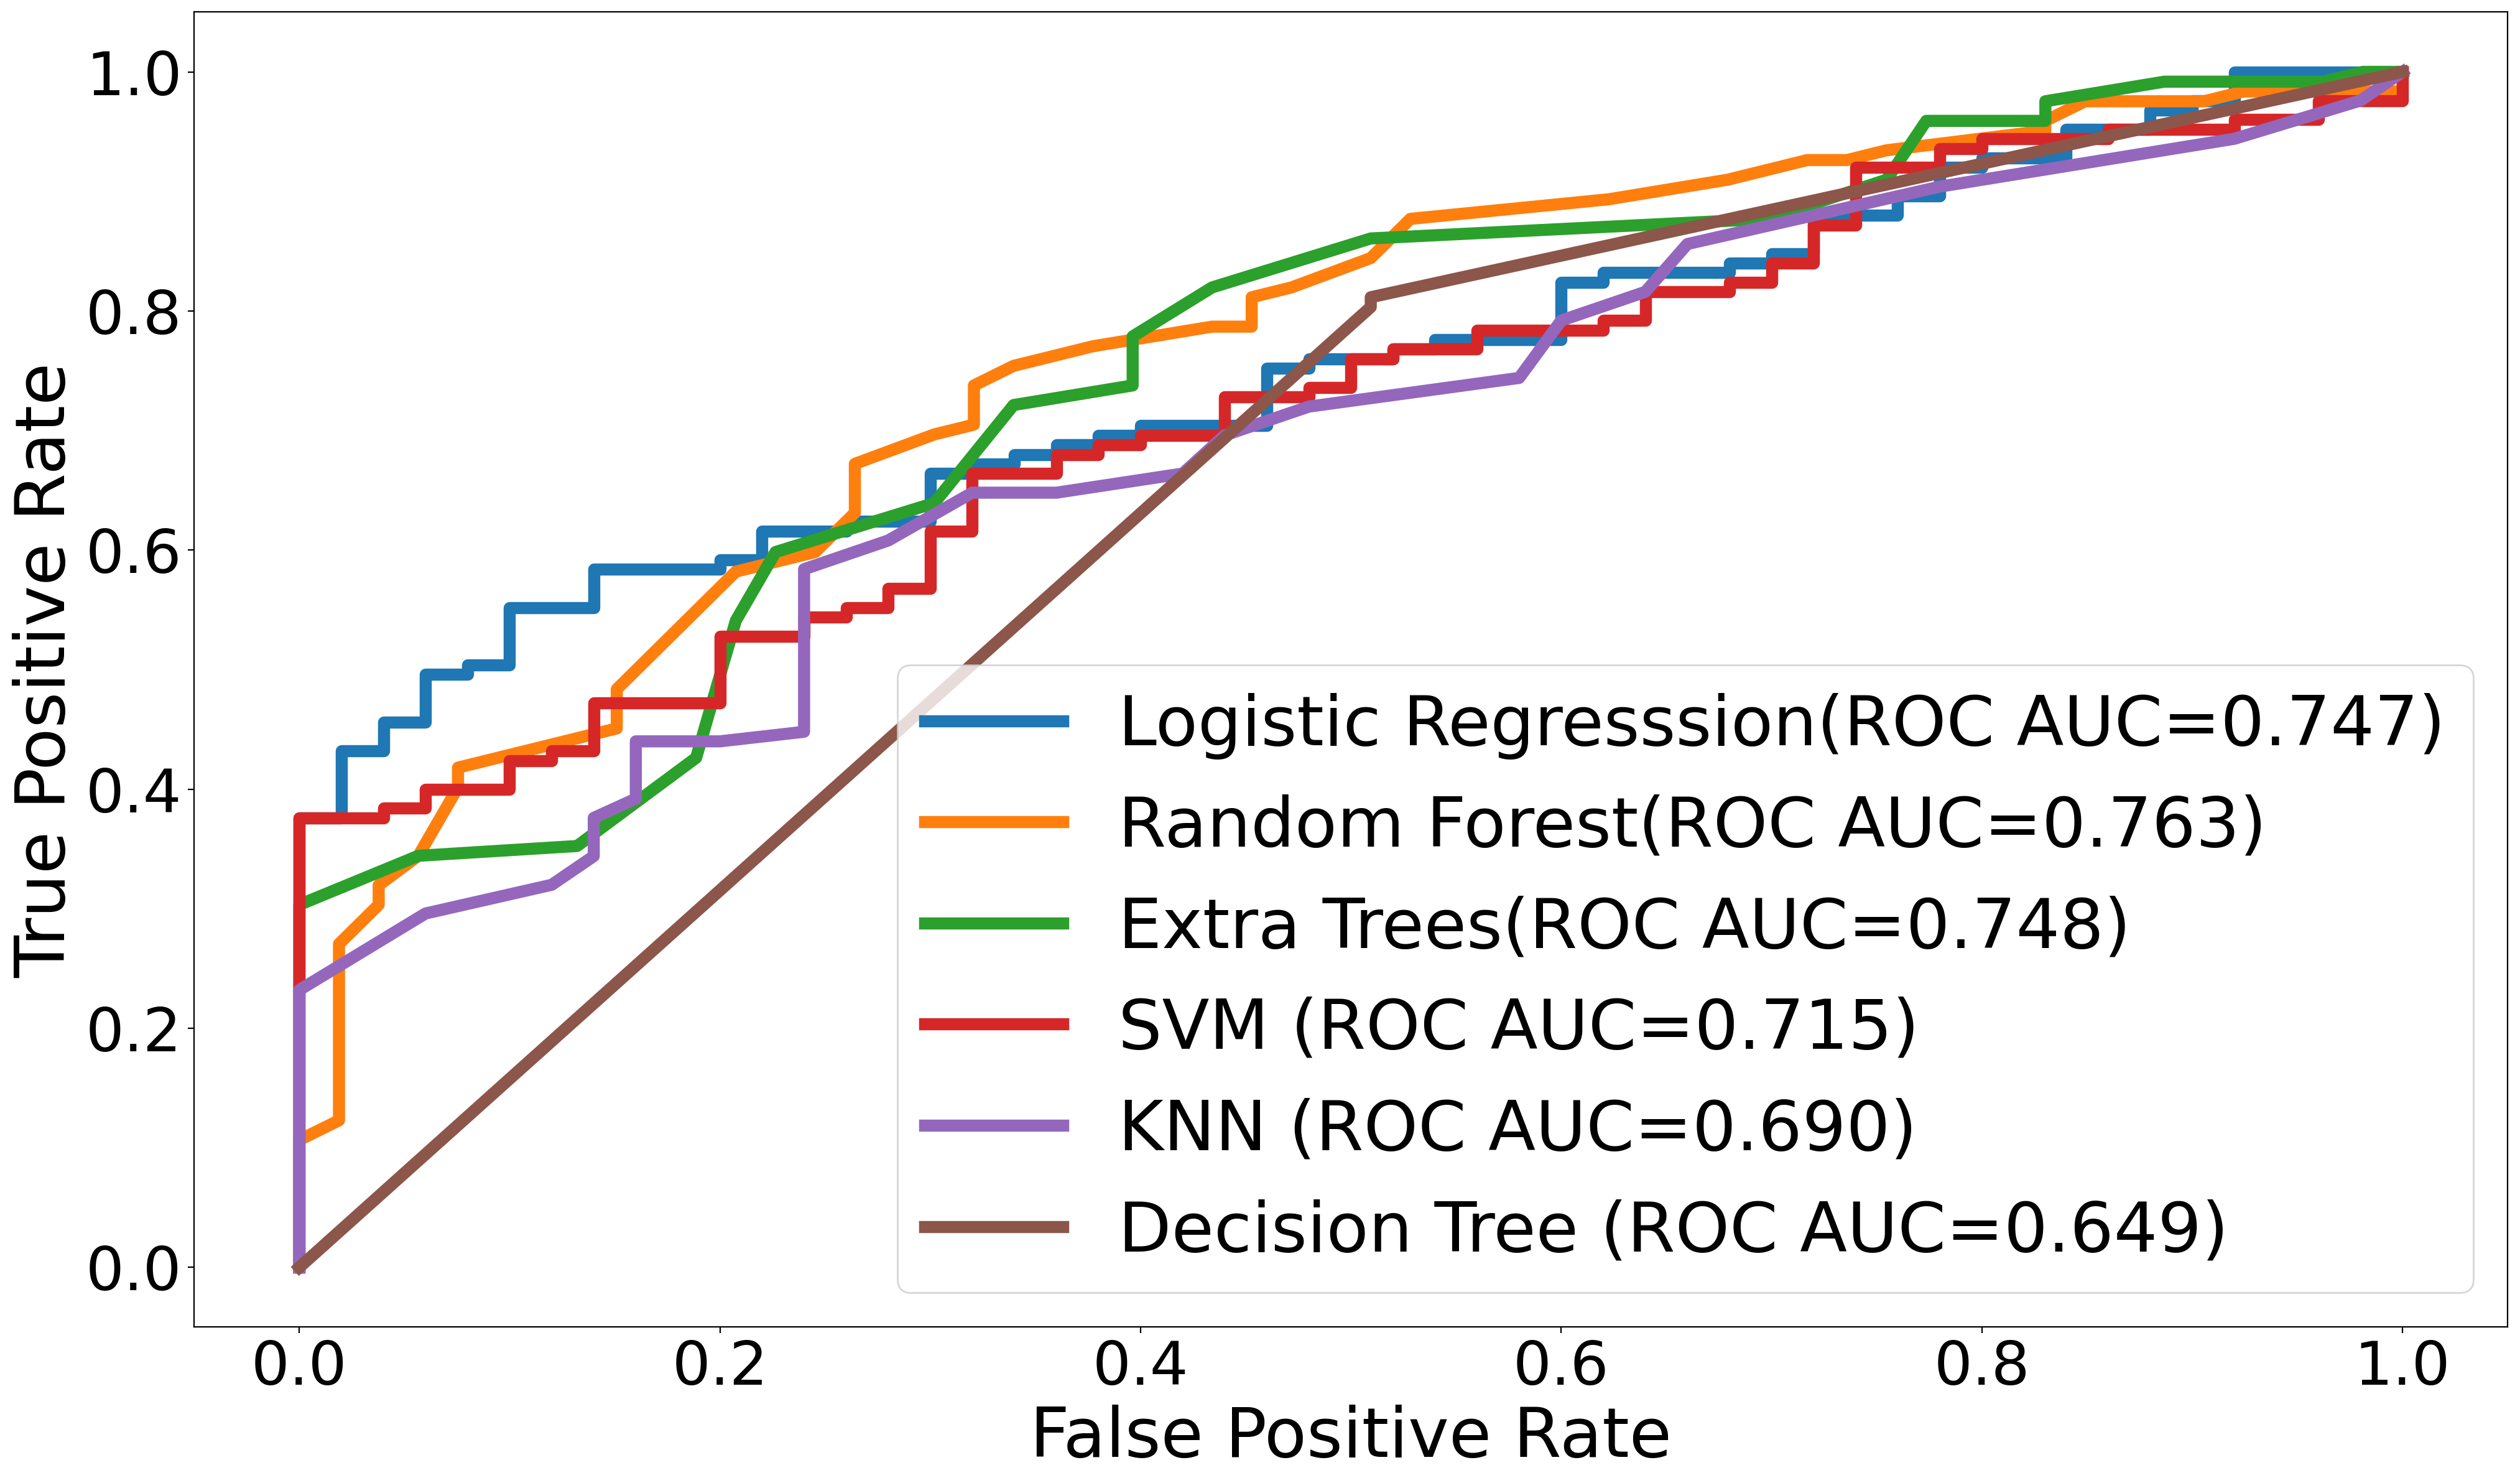

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(24, 14), dpi=200)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc),linewidth=7.0)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc),linewidth=7.0)
pyplot.plot(ex_fpr, ex_tpr, marker='.', label='Extra Trees(ROC AUC=%.3f)' % (ex_auc),linewidth=7.0)
pyplot.plot(sb_fpr, sb_tpr, marker='.', label='SVM (ROC AUC=%.3f)' % (sb_auc),linewidth=7.0)
pyplot.plot(kn_fpr, kn_tpr, marker='.', label='KNN (ROC AUC=%.3f)' % (kn_auc),linewidth=7.0)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (ROC AUC=%.3f)' % (dt_auc),linewidth=7.0)
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=40)
pyplot.ylabel('True Positive Rate',fontsize=40)
# show the legend
pyplot.tick_params(axis='both', labelsize=35)
pyplot.legend(fontsize=40)
# show the plot
pyplot.show()

# classification_report

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regration")
print(logisticTrainAccuracy)
print(logisticTestAccuracy)
print(classification_report(ytest,Logpred))
print("Random Forest")
print(randomTrainAccuracy)
print(randomTestAccuracy)
print(classification_report(ytest,Randompred))
print("Extraa Trees")
print(etreeTrainAcc)
print(etreeTestAcc)
print(classification_report(ytest,predictionclf7))
print("SVM")
print(svmTrainAccuracy)
print(svmTestAccuracy)
print(classification_report(ytest,SVMpred))
print("KNN")
print(knTrainAccuracy)
print(knTestAccuracy)
print(classification_report(ytest,KNNpred))
print("Dicicision Tree")
print(treeTrainAcc)
print(treeTestAcc)
print(classification_report(ytest,predictionclf6))

Logistic Regration
0.7254901960784313
0.7142857142857143
              precision    recall  f1-score   support

           0       0.19      0.06      0.09        53
           1       0.69      0.89      0.78       122

    accuracy                           0.64       175
   macro avg       0.44      0.48      0.43       175
weighted avg       0.53      0.64      0.57       175

Random Forest
1.0
0.7542857142857143
              precision    recall  f1-score   support

           0       0.62      0.47      0.54        53
           1       0.79      0.88      0.83       122

    accuracy                           0.75       175
   macro avg       0.71      0.67      0.69       175
weighted avg       0.74      0.75      0.74       175

Extraa Trees
1.0
0.7485714285714286
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        53
           1       0.80      0.86      0.83       122

    accuracy                           0.75       17

# Save Model

In [ ]:

import joblib


In [ ]:
joblib.dump(random,"liver_detector_random")

['liver_detector_random']

# Prediction

In [ ]:
to_predict = np.array([4,114.0,65.0,39.000000,179.500000,21.9,0.432,37]).reshape(1,8)
result=model7.predict(to_predict)
if(int(result[0])==1):
        print('Sorry ! You are Suffering Diabetes')
else:
        print('Congrats ! you are Healthy') 

Congrats ! you are Healthy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
np.save("xtrain_liver.npy",X_train_smote_random)

# Lime

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 4.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=8a55e7195a12b7e1e1ef5cacb7ff01b2b1b1ae32b1a7cc3107ea0bd33eef60fd
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_smote_random),
    feature_names=X_train_smote_random.columns,
    mode='classification'
)

In [ ]:
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
460,9,120.0,72.0,22.000000,56.000000,20.8,0.733,48
151,4,114.0,65.0,39.000000,179.500000,21.9,0.432,37
745,12,100.0,84.0,33.000000,105.000000,30.0,0.488,46
529,0,111.0,65.0,24.500000,147.000000,24.6,0.660,31
403,9,72.0,78.0,25.000000,113.666667,31.6,0.280,38
...,...,...,...,...,...,...,...,...
754,8,154.0,78.0,32.000000,310.000000,32.4,0.443,45
337,5,115.0,76.0,37.000000,199.000000,31.2,0.343,44
355,9,165.0,88.0,30.666667,125.666667,30.4,0.302,49
723,5,117.0,86.0,30.000000,105.000000,39.1,0.251,42


In [ ]:
exp = interpretor.explain_instance(
    data_row=xtest.iloc[15], ##new data
    predict_fn=random.predict_proba
)
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
!pip install shapash

     |████████████████████████████████| 899 kB 4.5 MB/s 
     |████████████████████████████████| 22.3 MB 38.2 MB/s 
     |████████████████████████████████| 642 kB 34.4 MB/s 
     |████████████████████████████████| 210 kB 34.9 MB/s 
     |████████████████████████████████| 564 kB 49.1 MB/s 
     |████████████████████████████████| 1.0 MB 22.1 MB/s 
     |████████████████████████████████| 3.3 MB 37.3 MB/s 
     |████████████████████████████████| 9.6 MB 44.2 MB/s 
     |████████████████████████████████| 34.5 MB 5.1 kB/s 
     |████████████████████████████████| 357 kB 53.4 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=871448fb0f91c0cf48d36c6e90b5752db4ea94ae0cccaaed76b5b629942fc74f
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=a9f797915552d9198aa615967b68b54ed6ff626a161fdd87a9ccacd62

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer(model=random)

In [ ]:
xpl.compile(
    x=xtest,
   
)

In [ ]:
xpl.plot.features_importance(label=1)

In [ ]:
xpl.plot.compare_plot(row_num=[10, 15], label=1)